# Nathan Zorndorf

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [6]:
# check the iowa file location for your computer 
iowa_file = '~/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

df = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(df.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [7]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [8]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [9]:
df.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [10]:
df.shape

(270955, 18)

In [11]:
df.isnull().values.sum()

2854

In [12]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [13]:
df['County Number'].isnull().sum()/df['County Number'].sum()

6.9728771910583244e-05

Very low percentage of rows have missing values so lets just drop them.

### 3.2 Clean the columns

In [14]:
df.dropna(axis=0, inplace=True)

Get rid of the '$' symbol in columns: 'State Bottle Retail', 'State Bottle Cost', 'Sale (Dollars)'

In [15]:
'$23.00'.replace('$','')

'23.00'

In [16]:
df['State Bottle Cost'] = df.apply(lambda x: float(x['State Bottle Cost'].replace('$','')), axis=1)

In [17]:
df['State Bottle Retail'] = df.apply(lambda x: float(x['State Bottle Retail'].replace('$','')), axis=1)

In [18]:
df['Sale (Dollars)'] = df.apply(lambda x: float(x['Sale (Dollars)'].replace('$','')), axis=1)

In [19]:
df.rename(columns={'State Bottle Cost':'State Bottle Cost (Dollars)', 'State Bottle Retail':'State Bottle Retail (Dollars)'}, inplace=True)

In [20]:
df.head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38


In [21]:
iowa_fips_code = 19 # from https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code

In [22]:
def make_fips_code(county_num):
    county_num = str(county_num)[:-2]
    county_num = int(county_num)
    
    if county_num < 10:
        return str(iowa_fips_code) + '00' + str(county_num)
    elif county_num < 100:
        return str(iowa_fips_code) + '0' + str(county_num)
    else:
        return str(iowa_fips_code) + str(county_num)
    
    return county_num


In [23]:
df['fips'] = df['County Number'].apply(make_fips_code)
df.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,19009
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,19082


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

Let's change Bottle Volume (ml) to (Liters)

In [24]:
df['Bottle Volume (Liters)'] = df.apply(lambda x: x['Bottle Volume (ml)']/1000., axis=1)

In [25]:
df.head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,19009,0.75


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


**My Plan**:

1) If a store is open for the full 2015 year, then they should have made at least one sale per month in the year of 2015. So we need to find the store numbers for the stores that made > 1 sale each month.
<br><br>
2) Then we can remove these from our data set. 
<br><br>
**OR** we can figure out how much they sell per month on average, and then just assume they sell that much for the months that they were not open. If we do this, we would need to make a new dataframe with the total amount sold for each month for each store.
<br><br>
**OR** to be very advanced, we can see how much the average monthly sales deviate from the average yearly sales  for all stores and then calculate how much the store would make in the months they werent open using the difference (in %) between average sales for each month for all stores and the average sales for 2015 for all stores.
<br><br>


Either way it seems we need to convert the dates into a datetime object.

In [26]:
df['DateTime'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [27]:
import datetime

In [28]:
start_date = datetime.datetime(year=2015, month=1, day=1)

In [29]:
end_date = datetime.datetime(year=2015, month=12, day=31)

In [30]:
df['Month'] = df['DateTime'].apply(lambda x: x.month)
df['Year'] = df['DateTime'].apply(lambda x: x.year)

In [31]:
df['DateTime'].dt.year.unique()

array([2015, 2016])

In [32]:
df.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters),DateTime,Month,Year
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,6.75,12,81.00,9.0,2.38,19009,0.75,2015-11-04,11,2015
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,20.63,2,41.26,1.5,0.40,19082,0.75,2016-03-02,3,2016
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,18.89,24,453.36,24.0,6.34,19007,1.00,2016-02-11,2,2016
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,14.25,6,85.50,10.5,2.77,19085,1.75,2016-02-03,2,2016
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,10.80,12,129.60,21.0,5.55,19099,1.75,2015-08-18,8,2015


In [33]:
df.DateTime.dtypes

dtype('<M8[ns]')

In [34]:
# Find the store that were open from January 2015 - January 2016

mask_jan_2015 = (df['DateTime'].dt.year == 2015) & (df['DateTime'].dt.month == 1)
mask_jan_2016 = (df['DateTime'].dt.year == 2016) & (df['DateTime'].dt.month == 1)

df_jan_2015 = df.loc[mask_jan_2015]
df_jan_2016 = df.loc[mask_jan_2016]

# df.loc[(df['DateTime'].dt.year == 2015) | (df['DateTime'].dt.year == 2016)]

# df[df['Store Number'].isin(df['Store Number'].loc[mask].unique())]

In [35]:
df['Store Number'].loc[mask_jan_2015].head(5)

12    3858
20    2590
21    3942
29    2545
31    2555
Name: Store Number, dtype: int64

In [36]:
df['Store Number'].loc[mask_jan_2016].head(5)

8     4757
14    2670
38    2637
44    3678
48    3635
Name: Store Number, dtype: int64

In [37]:
good_stores = df['Store Number'].loc[mask_jan_2015][df['Store Number'][mask_jan_2015].isin(df['Store Number'].loc[mask_jan_2016])].values.tolist()

In [38]:
good_stores

[3858,
 2590,
 3942,
 2545,
 2555,
 2549,
 2644,
 3612,
 2623,
 4167,
 2665,
 2648,
 4898,
 3045,
 5070,
 2594,
 3723,
 2612,
 2633,
 4829,
 4345,
 3562,
 3894,
 4008,
 4665,
 5034,
 2501,
 2643,
 2508,
 2643,
 3722,
 2619,
 2536,
 3942,
 3881,
 5089,
 3756,
 2544,
 3732,
 4617,
 4001,
 4515,
 2806,
 2515,
 3818,
 4597,
 2603,
 4752,
 2561,
 4265,
 4405,
 4169,
 2620,
 2584,
 2552,
 2607,
 3990,
 2588,
 4110,
 2633,
 3942,
 4102,
 2622,
 2538,
 4803,
 4840,
 2508,
 2627,
 4619,
 2604,
 3981,
 4829,
 4705,
 2509,
 2613,
 4073,
 2665,
 3907,
 4478,
 2584,
 2529,
 4256,
 2445,
 3908,
 4847,
 4803,
 2521,
 2643,
 3664,
 5091,
 2648,
 2556,
 2571,
 2651,
 2538,
 2528,
 2594,
 2567,
 3928,
 4673,
 2465,
 3889,
 2670,
 4722,
 3742,
 4297,
 4254,
 3664,
 2178,
 3871,
 2513,
 4743,
 2506,
 4378,
 2571,
 4312,
 2502,
 4180,
 3776,
 2515,
 4634,
 2588,
 4900,
 2413,
 2130,
 3990,
 2569,
 2652,
 3622,
 2564,
 4969,
 4421,
 2506,
 3774,
 2614,
 3495,
 4595,
 4306,
 2106,
 2592,
 4134,
 2605,
 3495,

In [39]:
dff = df[df['Store Number'].isin(good_stores)]

In [40]:
dff.shape

(248123, 23)

In [41]:
pd.set_option('display.max_columns', None)
dff.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters),DateTime,Month,Year
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,19009,0.75,2015-11-04,11,2015
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,19082,0.75,2016-03-02,3,2016
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,19007,1.00,2016-02-11,2,2016
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,19085,1.75,2016-02-03,2,2016
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,19099,1.75,2015-08-18,8,2015


In [42]:
# Keep only the data for 2015
mask_2015 = (dff['DateTime'].dt.year == 2015)
df15 = dff[mask_2015]
df15.reset_index(inplace=True)

In [43]:
df15.head(5)

,index,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters),DateTime,Month,Year
0,0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,19009,0.75,2015-11-04,11,2015
1,4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,19099,1.75,2015-08-18,8,2015
2,5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,19057,1.75,2015-04-20,4,2015
3,6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,19090,0.75,2015-08-05,8,2015
4,7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,19017,1.75,2015-06-25,6,2015


So now we have filtered out stores that were not open in BOTH january 2015 AND January 2016. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

In [44]:
df15.columns

Index([u'index', u'Date', u'Store Number', u'City', u'Zip Code',
       u'County Number', u'County', u'Category', u'Category Name',
       u'Vendor Number', u'Item Number', u'Item Description',
       u'Bottle Volume (ml)', u'State Bottle Cost (Dollars)',
       u'State Bottle Retail (Dollars)', u'Bottles Sold', u'Sale (Dollars)',
       u'Volume Sold (Liters)', u'Volume Sold (Gallons)', u'fips',
       u'Bottle Volume (Liters)', u'DateTime', u'Month', u'Year'],
      dtype='object')

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [45]:
df15.groupby(by='Store Number')['Sale (Dollars)'].sum()

Store Number
2106    146038.70
2113      9310.22
2130    111583.91
2152      7721.08
2178     24324.18
2190    121689.06
2191    125093.49
2200     22811.55
2228     17462.07
2233     29553.34
2238     11762.56
2248     67682.06
2285     76927.11
2290     56289.66
2327     10245.14
2353     53349.19
2413     90065.02
2445      7189.48
2448     17740.70
2459      7352.33
2465     25831.80
2475     10681.07
2478     19840.65
2498      2259.67
2500    149121.63
2501    144833.66
2502    150094.01
2505     70810.55
2506    143431.66
2507     29679.78
          ...    
5048      1566.34
5050     23639.01
5051      5602.57
5052      2310.30
5054     41078.22
5057      4258.48
5059      2418.45
5060      7500.54
5061      2882.76
5063     24694.01
5064      3293.81
5065      2728.39
5067      8416.48
5068     21599.25
5070      6691.12
5071      7149.19
5072      2676.94
5073      7409.64
5075      1656.08
5076      1631.04
5077     25290.60
5080     23506.93
5086      6410.35
5088      2015.

### 5.2 Calculate the profit each store is making in 2015.


1) First make a profit column for each item sold

In [46]:
df15.loc[:,'Profit (Dollars)'] = (df15.loc[:,'State Bottle Retail (Dollars)'] - df15.loc[:,'State Bottle Cost (Dollars)']) * df15.loc[:,'Bottles Sold']

/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
dff.loc[:,'Profit (Dollars)'] = (dff.loc[:,'State Bottle Retail (Dollars)'] - dff.loc[:,'State Bottle Cost (Dollars)']) * dff.loc[:,'Bottles Sold']

In [48]:
df15.head(5)

,index,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters),DateTime,Month,Year,Profit (Dollars)
0,0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,19009,0.75,2015-11-04,11,2015,27.00
1,4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,19099,1.75,2015-08-18,8,2015,43.20
2,5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,19057,1.75,2015-04-20,4,2015,39.96
3,6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,19090,0.75,2015-08-05,8,2015,9.99
4,7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,19017,1.75,2015-06-25,6,2015,15.76


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [49]:
total_profit_by_county = df15.groupby(['County', 'County Number'])['Profit (Dollars)'].sum()
total_profit_by_county = total_profit_by_county.reset_index().sort_values('Profit (Dollars)', ascending=False)
total_profit_by_county.head(5)
#dff.groupby(by='Store Number')[['Profit (Dollars)', 'City','County']].sum().sort_values(by='Profit (Dollars)', ascending=False)

,County,County Number,Profit (Dollars)
75,Polk,77.0,1941212.42
55,Linn,57.0,765683.26
80,Scott,82.0,664912.87
50,Johnson,52.0,523393.87
5,Black Hawk,7.0,508293.69


In [50]:
#df15.groupby(by='Store Number')['Profit (Dollars)'].sum().nlargest(10)
total_profit_by_county.nlargest(10, columns='Profit (Dollars)')

,County,County Number,Profit (Dollars)
75,Polk,77.0,1941212.42
55,Linn,57.0,765683.26
80,Scott,82.0,664912.87
50,Johnson,52.0,523393.87
5,Black Hawk,7.0,508293.69
76,Pottawattamie,78.0,332315.29
95,Woodbury,97.0,328707.98
29,Dubuque,31.0,283920.72
83,Story,85.0,282041.17
15,Cerro Gordo,17.0,189374.73


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [51]:
# group by store number (keep county columns) and find the sum of all profits for each store in 2015
# group by county and find the average profit for each store in 2015
# plot it 
df15_sum_profit_by_store = df15.groupby(['Store Number','County', 'County Number', 'fips'])['Profit (Dollars)'].sum().reset_index()
df15_avg_profit_by_county = df15_sum_profit_by_store.groupby(['County', 'County Number', 'fips'])['Profit (Dollars)'].mean().reset_index()
df15_avg_profit_by_county#.sort_values(by='Profit (Dollars)', ascending=False)

df15_avg_profit_by_county['Profit (Normalized)'] = df15_avg_profit_by_county['Profit (Dollars)'] / df15_avg_profit_by_county['Profit (Dollars)'].max()
df15_avg_profit_by_county

,County,County Number,fips,Profit (Dollars),Profit (Normalized)
0,Adair,1.0,19001,2164.111667,0.126765
1,Adams,2.0,19002,3417.670000,0.200193
2,Allamakee,3.0,19003,4461.706667,0.261348
3,Appanoose,4.0,19004,4289.883333,0.251284
4,Benton,6.0,19006,4357.152000,0.255224
5,Black Hawk,7.0,19007,9590.446981,0.561768
6,Boone,8.0,19008,4684.661538,0.274408
7,Bremer,9.0,19009,7858.615714,0.460325
8,Buchanan,10.0,19010,5288.763333,0.309794
9,Buena Vista,11.0,19011,5726.548000,0.335437


In [52]:
df15_avg_profit_by_county.loc[df15_avg_profit_by_county.fips == str(19001)]['Profit (Normalized)'].values[0]

0.12676465076363952

In [53]:
# Create color map

# Load the SVG map
svg = open('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/projects/project-2/USA_Counties_with_FIPS_and_names.svg', 'r').read()

# Load into Beautiful Soup
soup = bs(svg, 'html5lib')

# Find counties
paths = soup.findAll('path')

# Map colors
colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

# County style
path_style = 'font-size:12px;fill-rule:nonzero;stroke:#FFFFFF;stroke-opacity:1;stroke-width:0.1;stroke-miterlimit:4;stroke-dasharray:none;stroke-linecap:butt;marker-start:none;stroke-linejoin:bevel;fill:'

# Color the counties based on unemployment rate
for p in paths:
    
    if p['id'] not in ["State_Lines", "separator"]:
        
        state_code = int(p['id'][:2])
        
        if state_code == 19:
            # pass
            try:
                rate = df15_avg_profit_by_county.loc[df15_avg_profit_by_county.fips == str(p['id'])]['Profit (Normalized)'].values[0]
            except:
                continue

            if rate > 0.8:
                color_class = 5
            elif rate > 0.6:
                color_class = 4
            elif rate > 0.4:
                color_class = 3
            elif rate > 0.2:
                color_class = 2
            elif rate > 0:
                color_class = 1
            else:
                color_class = 0

                
            color = colors[color_class]
            
            p['style'] = path_style + str(color)


            
# Output map
pretty_soup = soup.prettify()


file = open("new_svg.svg", "wb")


file.write(str(pretty_soup))
    
file.close()


NameError: name 'bs' is not defined

** ANSWER ** SEE attached file. 

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [54]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost (Dollars)', u'State Bottle Retail (Dollars)',
       u'Bottles Sold', u'Sale (Dollars)', u'Volume Sold (Liters)',
       u'Volume Sold (Gallons)', u'fips', u'Bottle Volume (Liters)',
       u'DateTime', u'Month', u'Year'],
      dtype='object')

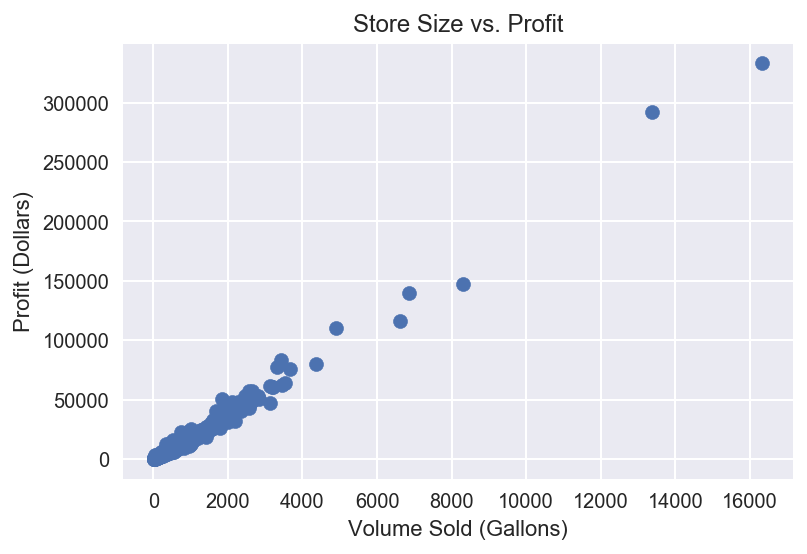

In [55]:
# Graph size of store (Volume Sold (Gallons)) vs Profit (Dollars) 
# first need to groupby store and sum columns
grouped = df15.groupby(by='Store Number').sum()
#grouped['Volume Sold (Gallons)']

fig, ax = plt.subplots(1, 1)

ax.scatter(grouped['Volume Sold (Gallons)'], grouped['Profit (Dollars)'])
plt.xlabel('Volume Sold (Gallons)')
plt.ylabel('Profit (Dollars)')
plt.title('Store Size vs. Profit')

**ANSWER** Looks Linear so yes profit seems to scale with size, which makes total sense because if you sell more gallons, you almost assuredly have higher profit. 

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [56]:
liquors = df15['Category Name'].unique().tolist()

In [57]:
liquor_categories = ['MISCELLANEOUS', 'WHISKEY', 'VODKA', 'GIN', 'BRANDY', 'SCHNAPPS', 'TEQUILA', 'SCOTCH','RUM']

In [58]:
print(liquors)

['APRICOT BRANDIES', 'VODKA 80 PROOF', 'AMERICAN DRY GINS', 'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES', 'AMERICAN COCKTAILS', 'VODKA FLAVORED', 'DISTILLED SPIRITS SPECIALTY', 'BLENDED WHISKIES', 'TEQUILA', 'TENNESSEE WHISKIES', 'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS', 'APPLE SCHNAPPS', 'CHERRY BRANDIES', 'MISC. IMPORTED CORDIALS & LIQUEURS', 'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH', 'SPICED RUM', 'IMPORTED VODKA', 'CREAM LIQUEURS', 'SCOTCH WHISKIES', '100 PROOF VODKA', 'STRAIGHT BOURBON WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES', 'IMPORTED DRY GINS', 'SPEARMINT SCHNAPPS', 'PUERTO RICO & VIRGIN ISLANDS RUM', 'TRIPLE SEC', 'AMERICAN AMARETTO', 'IMPORTED SCHNAPPS', 'MISCELLANEOUS  BRANDIES', 'STRAWBERRY SCHNAPPS', 'FLAVORED RUM', 'JAMAICA RUM', 'BARBADOS RUM', 'IMPORTED GRAPE BRANDIES', 'AMERICAN ALCOHOL', 'COFFEE LIQUEURS', 'ROOT BEER SCHNAPPS', 'DECANTERS & SPECIALTY PACKAGES',

In [59]:
def categorize_liquor(liquor):
    if 'WHISK' in liquor:
        return 'WHISKEY'
    elif 'BRAND' in liquor:
        return 'BRANDY'
    elif 'VODKA' in liquor:
        return 'VODKA'
    elif 'GIN' in liquor:
        return 'GIN'
    elif 'SCHNAPP' in liquor:
        return 'SCHNAPPS'
    elif 'TEQUILA' in liquor:
        return 'TEQUILA'
    elif 'SCOTCH' in liquor:
        return 'SCOTCH'
    elif "RUM" in liquor:
        return 'RUM'
    else:
        return 'MISCELLANEOUS'

In [60]:
# from collections import defaultdict


# liquor_dict = {}
# liquor_dict.fromkeys(liquor_categories, None)


# for liquor in liquors:
#     key = categorize_liquor(liquor)
#     if liquor_dict.get(key) == None:
#         liquor_dict[key] = liquor        
#     else:
#         liquor_dict[key].append(liquor)

In [61]:
df15['Liquor Category'] = df15['Category Name'].apply(categorize_liquor)

/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
dff['Liquor Category'] = dff['Category Name'].apply(categorize_liquor)

/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
dff.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters),DateTime,Month,Year,Profit (Dollars),Liquor Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,19009,0.75,2015-11-04,11,2015,27.00,BRANDY
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,19082,0.75,2016-03-02,3,2016,13.76,WHISKEY
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,19007,1.00,2016-02-11,2,2016,151.20,WHISKEY
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,19085,1.75,2016-02-03,2,2016,28.50,MISCELLANEOUS
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,19099,1.75,2015-08-18,8,2015,43.20,VODKA


### 5.7 Do relationships exist between the broader liquor type and profit?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

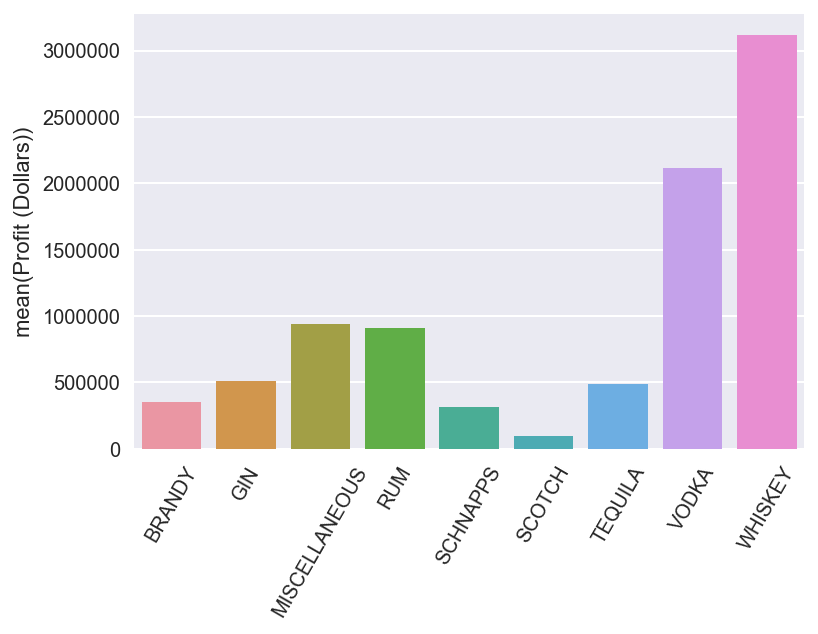

In [64]:
grouped = df15.groupby(by='Liquor Category').sum()

sns.barplot(x=grouped.index.tolist(), y=grouped['Profit (Dollars)'])

plt.xticks(rotation=60)

**ANSWER** MOst profit from vodka and whiskey. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [65]:
df15['Item Description'].unique().tolist()

['Mr. Boston Apricot Brandy',
 "Five O'clock Vodka",
 'New Amsterdam Gin',
 'Korbel Brandy',
 'Canadian Club Whisky',
 'Dekuyper Hot Damn!',
 'Knob Creek Single Barrel Reserve',
 "Chi-Chi's Margarita W/tequila",
 'Windsor Canadian Pet',
 'Uv Cake Vodka',
 'Juarez Gold Dss',
 'Lord Calvert Canadian Whisky',
 '44 North Huckleberry',
 'Black Velvet Traveler',
 'Seagrams 7 Crown Bl Whiskey',
 'Jose Cuervo Especial Reposado Tequila',
 'Jack Daniels Old #7 Black Lbl',
 'Crown Royal Canadian Whisky Mini',
 'Hawkeye Blend Whiskey',
 'UV Vodka PET',
 'Piehole Apple Pie Mini',
 'Paramount Gin',
 'Dekuyper 03',
 'Dekuyper Sour Apple',
 'Arrow Wild Cherry Flav Brandy',
 'Jagermeister Liqueur',
 'Bartenders Hot Sex',
 'Dekuyper Watermelon Pucker',
 'Paramount Blackberry Brandy',
 'New Amsterdam Vodka',
 'Oban Single Malt Scotch',
 'Margaritaville Skinny Island Punch',
 'Captain Morgan Spiced Rum',
 'Grey Goose Vodka',
 'Rumchata',
 'J & B Rare Scotch',
 'Smirnoff Vodka 100 Prf',
 "Chi-Chi's Orange 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

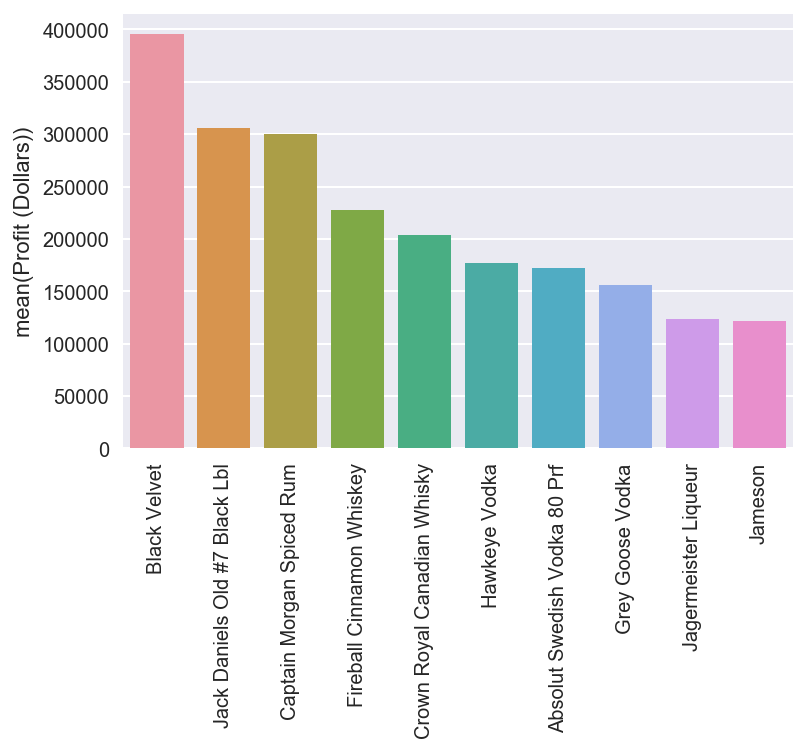

In [66]:
# Groupby brands, find brands with most profit 
grouped = df15.groupby(by='Item Description').sum()
largest_brands = grouped.nlargest(10, 'Profit (Dollars)')

# Plot 
sns.barplot(x=largest_brands.index.tolist(), y=largest_brands['Profit (Dollars)'])
plt.xticks(rotation=90)


**ANSWER** BLack Velvet, jack Daniels, Captain Morgan, Fireball are top 4 sellers. 

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

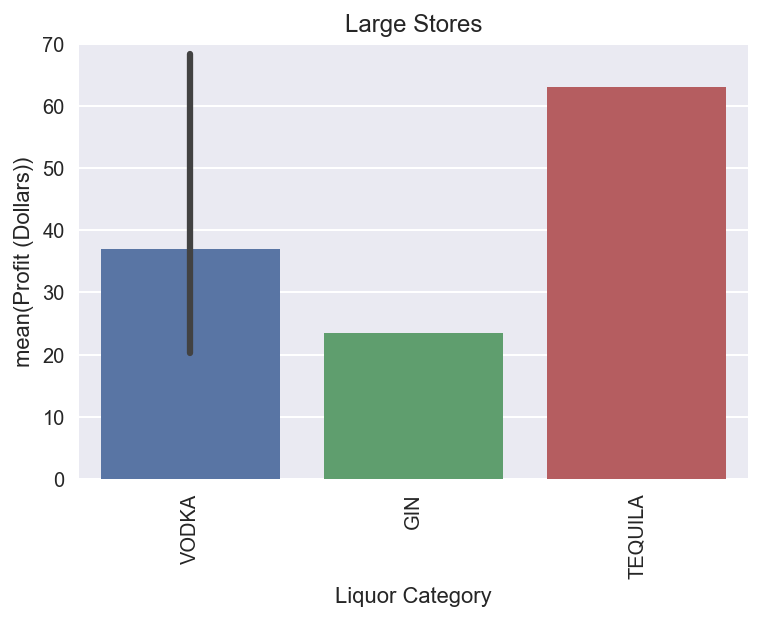

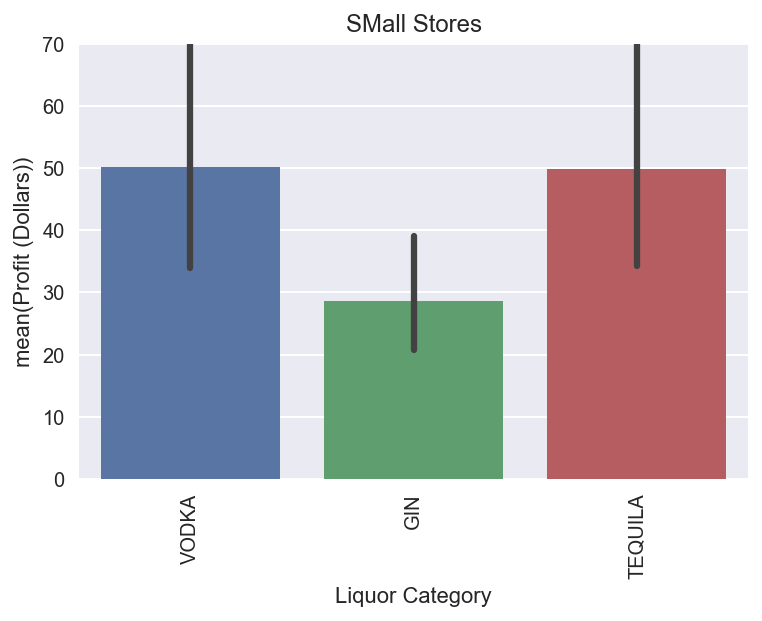

In [119]:
# Find the store number's of the stores that have the highest profit
largest_stores = df15.groupby(by=['Store Number']).sum()
largest_stores = largest_stores.sort_values('Profit (Dollars)', ascending=False)
largest_stores = largest_stores.ix[largest_stores['Profit (Dollars)'] > 100000, :] # Define "Big stores" as those that make over $100k
largest_stores_indeces = largest_stores.index.values

# # Find the store number's of every other store
smallest_stores = df15.groupby(by=['Store Number']).sum()

s_largest = set(largest_stores.index.values)
s_smallest = set(smallest_stores.index.values)
s_smallest = s_smallest.difference(s_largest)

smallest_stores = smallest_stores.loc[list(s_smallest), :].sort_values(by='Profit (Dollars)', ascending=False)
smallest_stores_indeces = smallest_stores.index.values
# # smallest_stores = smallest_stores.ix[smallest_stores['Profit (Dollars)'] <= 100000, :]


# # Find which liquor category the largest stores sell the most
df_large = df15.ix[largest_stores_indeces,:]
df_small = df15.ix[smallest_stores_indeces,:]

plt.figure(1)
sns.barplot(x=df_large.ix[df_large['Liquor Category'].isin(['VODKA','GIN','TEQUILA']),'Liquor Category'], y=df_large['Profit (Dollars)'], order=['VODKA','GIN','TEQUILA'])
plt.xticks(rotation=90)
plt.ylim(0, 70)
plt.title('Large Stores')
plt.figure(2)
# dff.loc[dff['Liquor Category'].isin(summer_liquors)]
sns.barplot(x=df_small.ix[df_small['Liquor Category'].isin(['VODKA','GIN','TEQUILA']),'Liquor Category'], y=df_small['Profit (Dollars)'], order=['VODKA','GIN','TEQUILA'])
plt.xticks(rotation=90)
plt.ylim(0,70)
plt.title('SMall Stores')


**Answer** So you could make a tax on tequila, because large stores sell over 10% more tequila than small stores. You could tax vodka less, because small stores sell over 10% more vodka. The tax will take a larger cut from large stores than smaller stores. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [65]:
def find_quarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    elif month in [10,11,12]:
        return 'Q4'
    

In [66]:
# Make a column for Quarter (Ex: Q1)
dff['Quarter'] = dff['Month'].apply(find_quarter)

mask_Q1 = dff['Quarter'] == 'Q1'
mask_2015 = dff['Year'] == 2015
mask_2016 = dff['Year'] == 2016

# Make a grouped object, grouped by County, for Q1 2015 Profit (Dollars) 
grouped_2015 = dff[mask_Q1 & mask_2015].groupby(by='County').sum()
df_county_2015_profit = grouped_2015['Profit (Dollars)']

# Make a grouped object, grouped by County, for Q1 2016 Profit (Dollars) 
grouped_2016 = dff[mask_Q1 & mask_2016].groupby(by='County').sum()
df_county_2016_profit = grouped_2016['Profit (Dollars)']


df_county_2015_profit.name = '2015 Profit'
df_county_2016_profit.name = '2016 Profit'

df_county_profit_combined = pd.concat(objs=[df_county_2015_profit, df_county_2016_profit], axis=1)

/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

**ANSWER** Metric = (2016_profit for store - 2015_profit for store) / (max diff in profit for all stores) * (profit of store for Q1 2016)

In [67]:
# So we want to make sure the difference in profit from 2015 to 2016 is positive.
df_county_profit_combined['Difference'] = df_county_profit_combined['2016 Profit'] - df_county_profit_combined['2015 Profit']
df_counties_most_growth = df_county_profit_combined[df_county_profit_combined['Difference'] > 0].sort_values('Difference', ascending=False).nlargest(20, columns='Difference')

# Metric is diff/max(diff) * profit Q1 2016
df_counties_most_growth['Outlook Metric'] = (df_counties_most_growth['Difference']/df_counties_most_growth['Difference'].max()) * df_counties_most_growth['2016 Profit']
df_counties_most_growth.sort_values(by='Outlook Metric', ascending=False)

,2015 Profit,2016 Profit,Difference,Outlook Metric
County,,,,
Johnson,98061.78,112503.10,14441.32,112503.100000
Pottawattamie,76510.73,86634.23,10123.50,60731.403182
Woodbury,76512.28,82227.07,5714.79,32539.299549
Black Hawk,108278.30,111257.46,2979.16,22951.764419
Dallas,34882.73,40480.14,5597.41,15689.974354
Lee,27090.57,31899.78,4809.21,10623.179943
Cerro Gordo,37398.85,41062.88,3664.03,10418.412182
Crawford,6222.68,12764.85,6542.17,5782.699831
Fayette,6088.05,10690.35,4602.30,3406.904480


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

**Answer:** I recommend Johnson County because it has the highest Outlook metric, meaning it has a large 2016 Profit and has seen a significant amount of growth from 2015 to 2016. 

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [68]:
mask_Q1 = dff['Quarter'] == 'Q1'
mask_2015 = dff['Year'] == 2015
mask_2016 = dff['Year'] == 2016
mask_liquor_type = dff['Liquor Category'] == 'WHISKEY'

# Make a grouped object, grouped by County, for Q1 2015 Profit (Dollars) 
grouped_2015 = dff[mask_Q1 & mask_2015 & mask_liquor_type].groupby(by='County').sum()
df_county_2015_profit_whiskey = grouped_2015['Profit (Dollars)']

# Make a grouped object, grouped by County, for Q1 2016 Profit (Dollars) 
grouped_2016 = dff[mask_Q1 & mask_2016 & mask_liquor_type].groupby(by='County').sum()
df_county_2016_profit_whiskey = grouped_2016['Profit (Dollars)']

# rename soon-to-be columns 
df_county_2016_profit_whiskey.name = '2015 Profit'
df_county_2015_profit_whiskey.name = '2016 Profit'

# make new df
df_county_profit_combined_whiskey = pd.concat(objs=[df_county_2015_profit_whiskey, df_county_2016_profit_whiskey], axis=1)


# Find the difference in profit between 2015 and 2016 
df_county_profit_combined_whiskey['Difference'] = df_county_profit_combined_whiskey['2016 Profit'] - df_county_profit_combined_whiskey['2015 Profit']

# So we want to make sure the difference in profit from 2015 to 2016 is positive.
df_counties_most_growth_whiskey = df_county_profit_combined_whiskey[df_county_profit_combined_whiskey['Difference'] > 0].sort_values('Difference', ascending=False).nlargest(20, columns='Difference')

# Metric is diff/max(diff) * profit Q1 2016
df_counties_most_growth_whiskey['Outlook Metric'] = (df_counties_most_growth_whiskey['Difference']/df_counties_most_growth_whiskey['Difference'].max()) * df_counties_most_growth_whiskey['2016 Profit']
df_counties_most_growth_whiskey.sort_values(by='Outlook Metric', ascending=False)

,2016 Profit,2015 Profit,Difference,Outlook Metric
County,,,,
Polk,138885.79,130640.58,8245.21,103677.748505
Linn,60606.50,49561.29,11045.21,60606.500000
Scott,42865.96,40542.30,2323.66,9018.019269
Carroll,11120.16,3723.61,7396.55,7446.741117
Story,24559.97,21275.19,3284.78,7303.989535
Dallas,17193.35,13220.97,3972.38,6183.541976
Dubuque,20821.02,18549.94,2271.08,4281.150119
Boone,8261.60,3817.70,4443.90,3323.949861
Howard,6330.01,780.37,5549.64,3180.498759


**1.** Whiskey and Vodka are the highest sellers in general.
<br>
**2.** If you want to sell Whiskey, go for Polk county. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [69]:
# Hypotheses:
# 1) ALcohol sales spike on friday?
# 2) Do people buy more ['GIN','VODKA','TEQUILA','RUM] in the summer? 
# 3) WHich month are people least likely to buy vodka?

In [70]:
import datetime 

# Make day of week column 
dff['Day'] = dff['DateTime'].apply(lambda x: x.day)
dff['Weekday'] = dff['DateTime'].apply(lambda x: datetime.datetime.strftime(x, '%a'))
# pd.concat(objs=[dff, dff['DateTime'].apply(lambda x: datetime.datetime.strftime(x, '%a'))])
# S = dff['DateTime'].apply(lambda x: x.day)



/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 1) Do alcohol sales spike on friday?

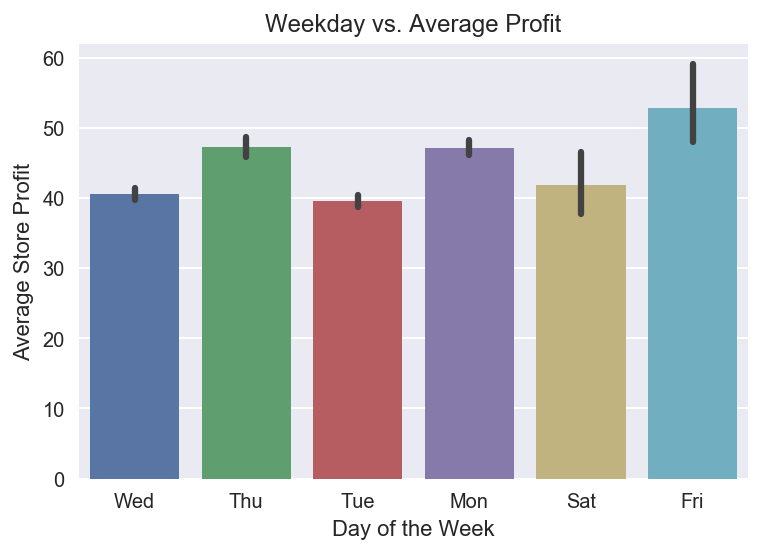

In [71]:
# barplot for Profit (Dollars)
ax = sns.barplot(x=dff['Weekday'], y=dff['Profit (Dollars)'], estimator=np.mean)
ax.set(xlabel='Day of the Week', ylabel='Average Store Profit', title='Weekday vs. Average Profit')
plt.show()


**Answer** From doing basic EDA it seems that friday might have higher sales on average, but it would take a z-test to really make this claim with more confidence. 

### 2) Do people buy more ['GIN','VODKA','TEQUILA','RUM] in the summer? 

In [72]:
summer_months = [6,7,8]
summer_liquors = ['GIN','VODKA','TEQUILA','RUM']

In [73]:
dff['Summer'] = dff['Month'].apply(lambda x: 1 if x in [6,7,8] else 0)

/Users/Naekid/anaconda3/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
# Make a dataframe that just includes summer months
dff_summer_liquors = dff.loc[dff['Liquor Category'].isin(summer_liquors)]

# Make a dataframe that has summer liquors
dff_summer_months = dff_summer_liquors.loc[dff_summer_liquors['Month'].isin(summer_months)]
dff_all_months = dff_summer_liquors

# Find average of profit for both dataframes
print 'summer profit mean: ' + str(dff_summer_months['Profit (Dollars)'].mean())
print 'year-round profit mean: ' + str(dff_all_months['Profit (Dollars)'].mean())




summer profit mean: 42.7624287803
year-round profit mean: 42.7932153744


From that, we pretty firmly establish that profit from that group doesn't increase in the summer. But People might buy more Rum in the summer than the winter...

In [75]:
# Make a dataframe that just includes summer months
dff_summer_liquors = dff.loc[dff['Liquor Category'].isin(['RUM'])]

# Make a dataframe that has summer liquors
dff_summer_months = dff_summer_liquors.loc[dff_summer_liquors['Month'].isin(summer_months)]
dff_all_months = dff_summer_liquors

# Find average of profit for both dataframes
print 'summer profit mean: ' + str(dff_summer_months['Profit (Dollars)'].mean())
print 'year-round profit mean: ' + str(dff_all_months['Profit (Dollars)'].mean())




summer profit mean: 47.5477202766
year-round profit mean: 52.7685659491


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

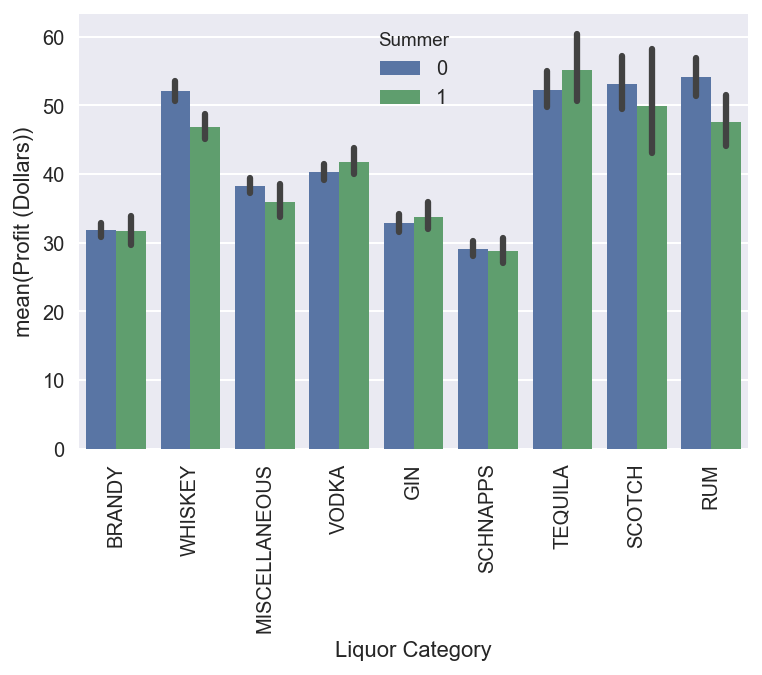

In [76]:
# Why not just make a barplot
ax = sns.barplot(x=dff['Liquor Category'], y=dff['Profit (Dollars)'], hue=dff['Summer'], estimator=np.mean)
plt.xticks(rotation=90)

** Answer** Tequila and vodka show higher summer sales. 

### 3) Which month are people least likely to buy vodka?

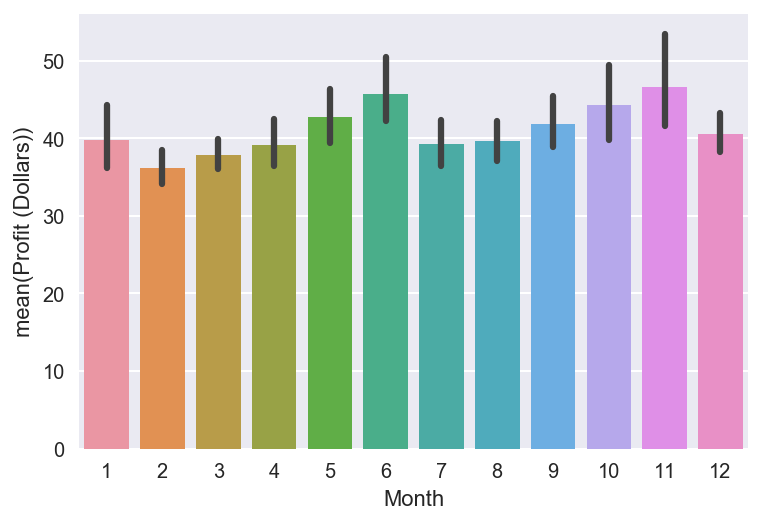

In [77]:
order = sorted(dff['Month'].unique())
sns.barplot(x=dff['Month'], y=dff[dff['Liquor Category']=='VODKA']['Profit (Dollars)'], order=order)

**Answer** People are most likely to buy Vodka in June and in November, based on quick graph, we'd need to run a t-test to be more confident.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [78]:
dff.head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),fips,Bottle Volume (Liters),DateTime,Month,Year,Profit (Dollars),Liquor Category,Quarter,Day,Weekday,Summer
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,19009,0.75,2015-11-04,11,2015,27.0,BRANDY,Q4,4,Wed,0


In [154]:
whiskey_mask = dff['Liquor Category']=='WHISKEY'
dff_whiskey = dff[whiskey_mask].sample(n=5000)
whiskey_cost_per_gallon = dff_whiskey['State Bottle Cost (Dollars)'] * dff_whiskey['Bottles Sold']/dff_whiskey['Volume Sold (Gallons)']
avg_whiskey_cost_per_gallon = whiskey_cost_per_gallon.mean()
avg_whiskey_cost_per_gallon 

50.182701448987387

**Answer** 20,000 * 50 = $1,000,000

In [122]:
df15.groupby(by='Store Number').sum()

,index,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost (Dollars),State Bottle Retail (Dollars),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Bottle Volume (Liters),Month,Year,Profit (Dollars)
Store Number,,,,,,,,,,,,,,,,
2106,70507803,3682.0,5.516445e+08,143582,33531134,477600,5417.16,8131.82,10355,146038.70,9719.85,2568.16,477.600,3420,1059890,48742.20
2113,20298627,13818.0,1.524763e+08,34968,6358241,139125,1597.97,2398.40,671,9310.22,659.85,174.29,139.125,971,296205,3109.04
2130,55585334,2737.0,4.092679e+08,101407,20359013,363550,3840.70,5763.64,7418,111583.91,6879.37,1817.48,363.550,2603,787865,37229.32
2152,18809555,2397.0,1.468066e+08,33833,5603803,149500,1207.67,1817.16,573,7721.08,633.37,167.28,149.500,972,284115,2587.53
2178,33214684,711.0,2.474773e+08,54476,10550395,241700,2296.49,3450.41,1928,24324.18,1917.12,506.50,241.700,1582,477555,8165.70
2190,177725686,101255.0,1.368621e+09,329163,74567726,1057300,15142.84,22735.99,11111,121689.06,6322.17,1671.50,1057.300,8340,2649725,40617.73
2191,82540459,33376.0,6.284663e+08,158192,29945364,586625,6883.31,10327.05,7696,125093.49,8053.32,2127.56,586.625,3836,1200940,41744.39
2200,51582773,32643.0,4.207239e+08,94868,16869716,450550,4516.61,6781.82,1668,22811.55,1817.24,480.01,450.550,2730,812045,7653.47
2228,31226851,14640.0,2.519445e+08,59981,10652884,224050,2337.13,3507.23,1312,17462.07,1367.65,361.37,224.050,1604,483600,5844.34


In [138]:
# Find total monthly profit for each store in Polk county 
grouped = df15[df15['County']=='Polk'].groupby(by=['Store Number', 'Month']).sum()

# Find mean monthly profit  for each store
grouped_2 = grouped.reset_index().groupby(by='Store Number').mean()

grouped_2 = grouped_2.sort_values(by='Profit (Dollars)', ascending=False).iloc[:20, :]

# Assume that the store will sell this mean monthly profit from whiskey alone  and that his store will sell like those stores in the top 20

# Find the mean profit across all stores
prof_mean = grouped_2['Profit (Dollars)'].mean()
prof_std = grouped_2['Profit (Dollars)'].std()

print round(prof_mean, 2), round(prof_std, 2)

5749.42 7162.91


Avg monthly profit = 5750
<br>
Total cost to set up store = 1,150,000
<br>
**Answer** # Months until break even = 1,150,000 / 5749 = x
<br>
<br> x = 200 months

!!

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

**Expected profits / quarter = expected monthly profits * 3 = 17250 dollars**

The question seems to be asking, what is the maximum quarterly interest payment amount that will have a 99% confidence interval that excludes the average quarterly profit. 



In [81]:
grouped = df15[df15['Liquor Category']=='WHISKEY'].groupby(by='Month').sum()
grouped['Profit (Dollars)'].std()

48047.980833537418

I'm going to ignore the part about ' the interest rate is applied to the remaining balance on the loan and added to his debt.' and just assume the interest rate is calculated from the initial 1,150,000. 

In [147]:
import scipy.stats as stats

normal = stats.norm(prof_mean*3, prof_std*3)

alpha = 0.45
upper = normal.ppf(1. - alpha/2.)
lower = normal.ppf(alpha/2.)
print round(lower, 2), round(upper,2)

1015.35 33481.15


to be 99% confident that his profit will **always** exceed his interest payments, he would have to just make more money, because our confidence interval range includes numbers below 0, and an interest payment can't be below 0. He can't even be 60% confident. But he can be 55% confident, as that gives a range of [\$1015, \$33481]. In that case the largest interest rate he could pay would be equal to the lower limit, which is 1010/1,150,000 = 0.00087 = 0.001 = 0.1%. Good luck gettin' a bank to finance your budiness buddy! Better stick with the moonshine operation. 